In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [61]:
pd.set_option('display.precision', 3)
import warnings
warnings.filterwarnings("ignore")

In [62]:
df = pd.read_csv('kaggle data/supply_chain_data.csv')
df.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808,55,802,8661.997,Non-binary,58,7,96,...,Mumbai,29,215,29,46.280,Pending,0.226,Road,Route B,187.752
1,skincare,SKU1,14.844,95,736,7460.900,Female,53,30,37,...,Mumbai,23,517,30,33.617,Pending,4.854,Road,Route B,503.066
2,haircare,SKU2,11.320,34,8,9577.750,Unknown,1,10,88,...,Mumbai,12,971,27,30.688,Pending,4.581,Air,Route C,141.920
3,skincare,SKU3,61.163,68,83,7766.836,Non-binary,23,13,59,...,Kolkata,24,937,18,35.625,Fail,4.747,Rail,Route A,254.776
4,skincare,SKU4,4.805,26,871,2686.505,Non-binary,5,3,56,...,Delhi,5,414,3,92.065,Fail,3.146,Air,Route A,923.441


In [63]:
df.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000,100.000,100.00,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000
mean,49.462,48.400,460.99,5776.048,47.770,15.960,49.220,5.750,5.548,17.080,567.840,14.770,47.267,2.277,529.246
std,31.168,30.743,303.78,2732.842,31.369,8.786,26.784,2.724,2.651,8.846,263.047,8.912,28.983,1.461,258.302
min,1.700,1.000,8.00,1061.619,0.000,1.000,1.000,1.000,1.013,1.000,104.000,1.000,1.085,0.019,103.916
25%,19.598,22.750,184.25,2812.847,16.750,8.000,26.000,3.750,3.540,10.000,352.000,7.000,22.983,1.010,318.778
50%,51.240,43.500,392.50,6006.352,47.500,17.000,52.000,6.000,5.321,18.000,568.500,14.000,45.906,2.142,520.430
75%,77.198,75.000,704.25,8253.977,73.000,24.000,71.250,8.000,7.602,25.000,797.000,23.000,68.621,3.564,763.078
max,99.171,100.000,996.00,9866.465,100.000,30.000,96.000,10.000,9.930,30.000,985.000,30.000,99.466,4.939,997.413


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [65]:
# cleaning the dataframe 
df.columns = [col.lower().replace(' ', '_') for col in df.columns]
df.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)

#### Grouping by different categories

In [66]:
def plot_bar(df, col_name):
    df_temp = df.groupby(col_name)
    plt.figure(figsize=(15, 3))
    
    plt.subplot(1,3,1)
    df_temp['stock_levels'].sum().sort_values(ascending=False).plot.bar(title=f'Stock levels by {col_name}')

    plt.subplot(1,3,2)
    df_temp['revenue_generated'].sum().sort_values(ascending=False).plot.bar(title=f'Revenue generated by {col_name}')
    
    plt.subplot(1,3,3)
    df_temp['number_of_products_sold'].sum().sort_values(ascending=False).plot.bar(title=f'Number of products sold based on {col_name}')
    
    plt.show()

1. Product Type

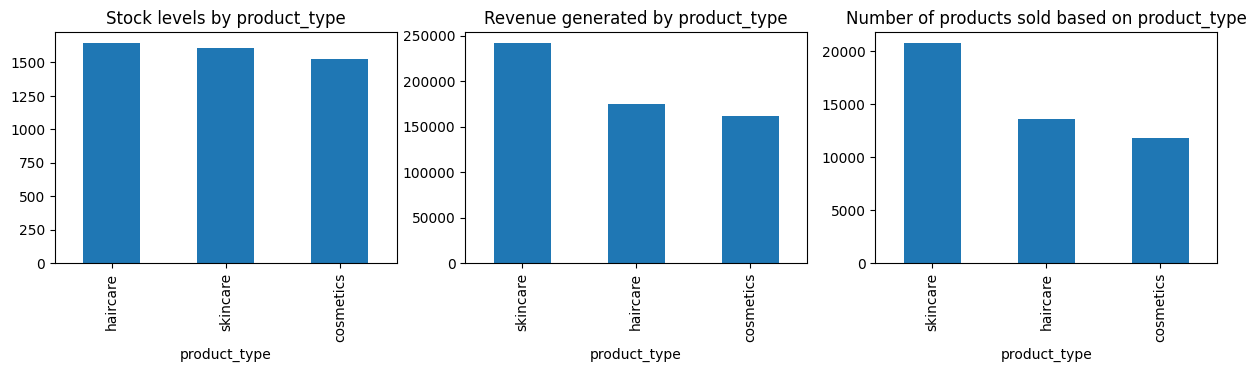

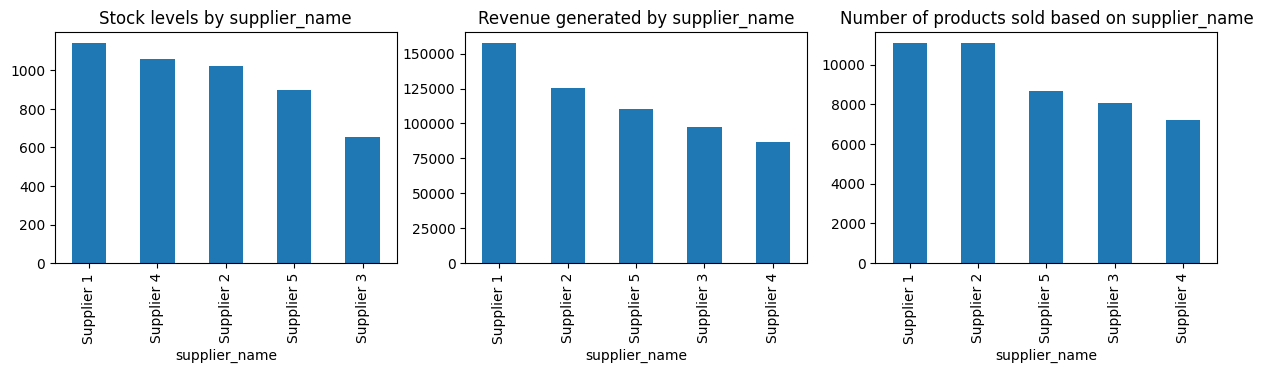

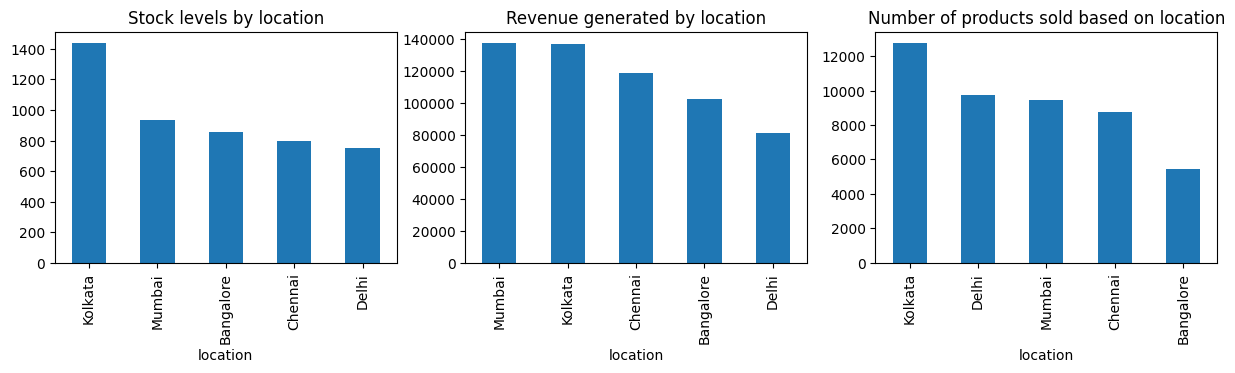

In [67]:
plot_bar(df, 'product_type')
plot_bar(df, 'supplier_name')
plot_bar(df, 'location')

### Data Modeling

In [68]:
df.location.unique()

array(['Mumbai', 'Kolkata', 'Delhi', 'Bangalore', 'Chennai'], dtype=object)

##### causal effect of lead time on defect rates

In [69]:
import dowhy
from dowhy import CausalModel
from sklearn.preprocessing import LabelEncoder

In [120]:
le_product = LabelEncoder()
le_location = LabelEncoder()
df['product_type'] = le_product.fit_transform(df['product_type'])
df['location'] = le_location.fit_transform(df['location'])

In [121]:
model = CausalModel(
    data=df,
    treatment='lead_time',
    outcome='defect_rates',
    common_causes=['price', 'product_type', 'location', 'costs'],
)
model 

In [122]:
# 1. Identification 
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                        
───────────(E[defect_rates|location,product_type,costs,price])
d[leadₜᵢₘₑ]                                                   
Estimand assumption 1, Unconfoundedness: If U→{lead_time} and U→defect_rates then P(defect_rates|lead_time,location,product_type,costs,price,U) = P(defect_rates|lead_time,location,product_type,costs,price)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [123]:
# 2. Estimation using Linear Regression for treatment effect
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print(f"Estimated causal effect: {estimate.value}")

Estimated causal effect: 0.05336531093975916


In [128]:
# 3. Refute the estimate (robustness checks)
refutation = model.refute_estimate(
    identified_estimand, estimate,
    method_name="placebo_treatment_refuter"
)

print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.05336531093975916
New effect:-9.78974772443797e-06
p value:0.96



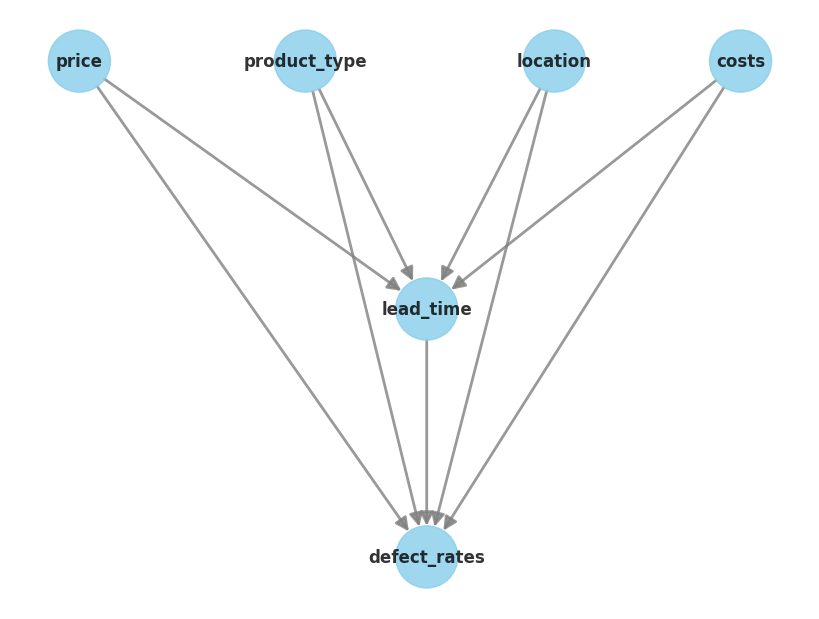

In [129]:
model.view_model(layout="dot")
plt.show()

#### Predicting stock levels

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [111]:
# Features (X) and Target (y)
X = df[['product_type', 'price', 'availability', 'revenue_generated', 'lead_times', 'order_quantities', 'defect_rates']]
y = df['stock_levels']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [112]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
# Random Forest Regressor
model = RandomForestRegressor(n_estimators=300, random_state=42)
print(model)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)


RandomForestRegressor(n_estimators=300, random_state=42)

In [114]:
y_pred = model.predict(X_test_scaled)
y_pred.shape

In [115]:

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1064.3124329629632
Mean Absolute Error (MAE): 27.590555555555557
R-squared (R2): 0.017420696972432204


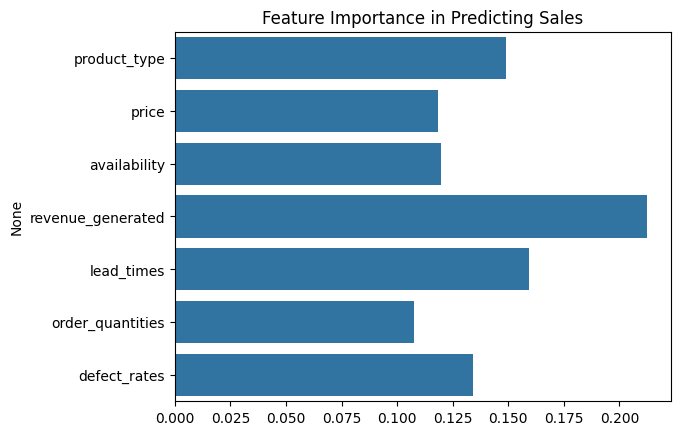

In [116]:
# Feature Importance
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance in Predicting Sales')
plt.show()

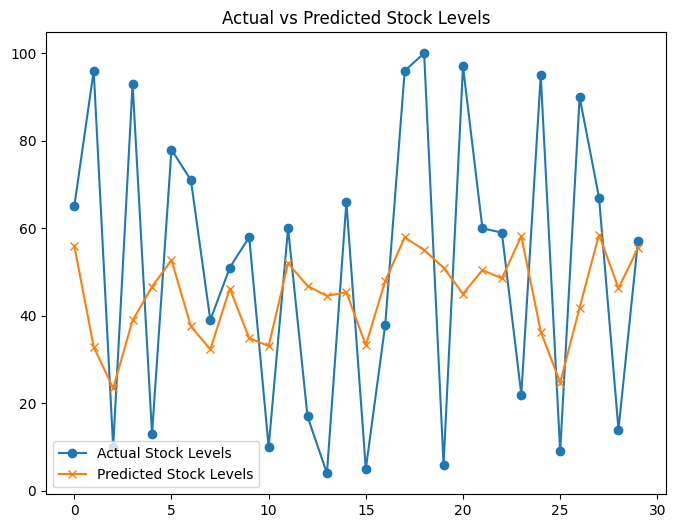

In [118]:
# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Actual Stock Levels', marker='o')
plt.plot(y_pred, label='Predicted Stock Levels', marker='x')
plt.title('Actual vs Predicted Stock Levels')
plt.legend()
plt.show()